In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load stock data
with open('FMIB_stocks.pkl','rb') as f:
    data = pickle.load(f)

In [21]:
#data.columns.get_level_values(0)

Index(['Adj Close', 'Adj Close', 'Adj Close', 'Adj Close', 'Adj Close',
       'Adj Close', 'Adj Close', 'Adj Close', 'Adj Close', 'Adj Close',
       ...
       'Volume', 'Volume', 'Volume', 'Volume', 'Volume', 'Volume', 'Volume',
       'Volume', 'Volume', 'Volume'],
      dtype='object', name='Attributes', length=240)

In [56]:
mib_index = pd.read_csv('FMIB_index.csv', index_col=['Date'], parse_dates=True).iloc[::-1]
MIB = mib_index[['Close']].loc[data.index[0]:data.index[-1]]
MIB.rename(columns={'Close': '^FMIB'}, inplace=True)

In [57]:
# Compute Returns to compare stocks
returns = (data['Close']-data['Close'].iloc[0])/data['Close'].iloc[0]
MIB_r = (MIB-MIB.iloc[0])/MIB.iloc[0]

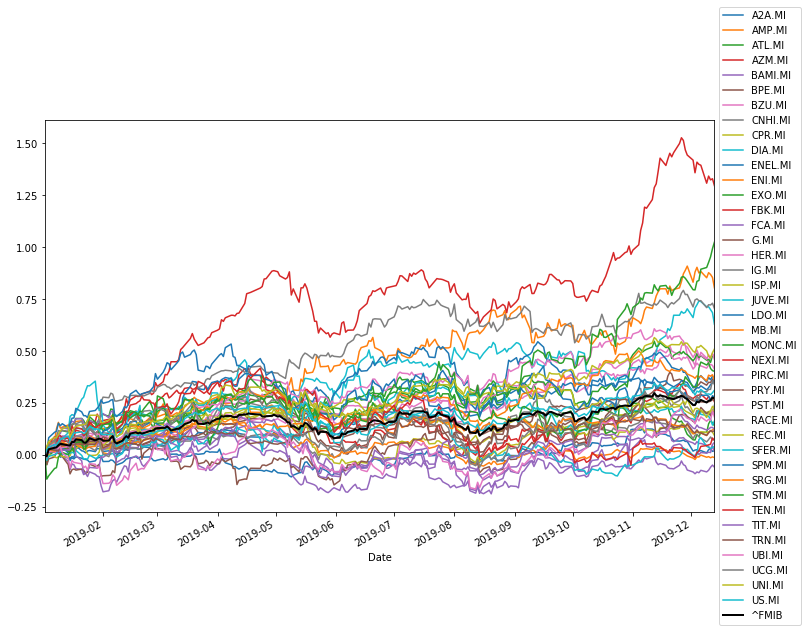

In [58]:
fig, ax =  plt.subplots(figsize=(12,8))
returns.plot(ax=ax)
MIB_r.plot(ax=ax, linewidth=2, c='k')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [60]:
returns.iloc[-1].sort_values(ascending = False)

Symbols
AZM.MI     1.297010
STM.MI     1.024722
AMP.MI     0.804457
RACE.MI    0.704808
DIA.MI     0.629214
UNI.MI     0.510405
BZU.MI     0.482384
EXO.MI     0.468717
PST.MI     0.459111
HER.MI     0.412804
MONC.MI    0.402606
LDO.MI     0.371388
ENEL.MI    0.362116
MB.MI      0.360077
BPE.MI     0.356189
UCG.MI     0.339132
US.MI      0.312105
SPM.MI     0.278658
G.MI       0.264392
FBK.MI     0.255426
CNHI.MI    0.240122
ISP.MI     0.221150
PRY.MI     0.213180
REC.MI     0.212192
UBI.MI     0.182584
JUVE.MI    0.163794
ATL.MI     0.140360
SRG.MI     0.127411
TIT.MI     0.123979
TRN.MI     0.117206
CPR.MI     0.093623
IG.MI      0.073884
TEN.MI     0.070078
FCA.MI     0.060481
SFER.MI    0.040590
A2A.MI     0.020268
BAMI.MI    0.016506
ENI.MI    -0.012772
PIRC.MI   -0.059417
NEXI.MI         NaN
Name: 2019-12-13 00:00:00, dtype: float64

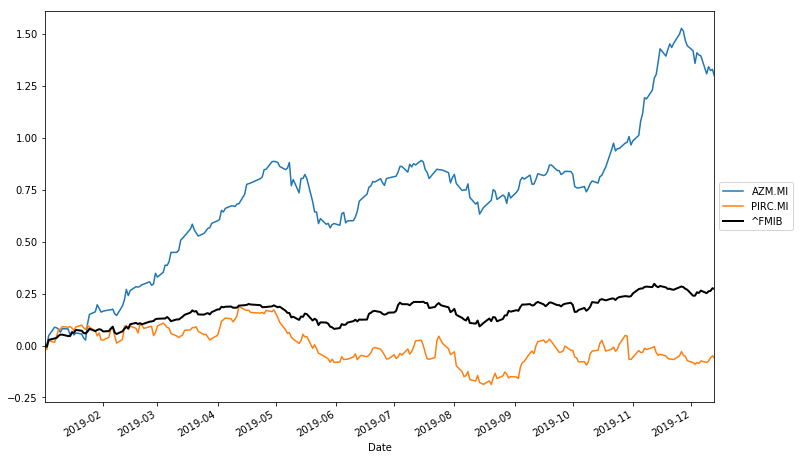

In [61]:
# Plot best and worst stock against market index
fig, ax =  plt.subplots(figsize=(12,8))
returns[['AZM.MI', 'PIRC.MI']].plot(ax=ax)
MIB_r.plot(ax=ax, linewidth=2, c='k')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [62]:
#data['Close'][['AZM.MI', 'PIRC.MI']]

**Analyze by Sector**

In [63]:
tickers = pd.read_csv('FMIB_tickers.csv', index_col=[0])
sector_list = tickers['Sector'].value_counts()
sector_list

Banche                                         7
Servizi pubblici                               6
Prodotti e servizi industriali                 5
Assicurazioni                                  4
Salute                                         3
Automobili e componentistica                   3
Moda, prodotti per la casa e per la persona    2
Servizi finanziari                             2
Petrolio e gas naturale                        2
Tecnologia                                     1
Telecomunicazioni                              1
Viaggi e tempo libero                          1
Materie prime                                  1
Edilizia e materiali                           1
Alimentari                                     1
Name: Sector, dtype: int64

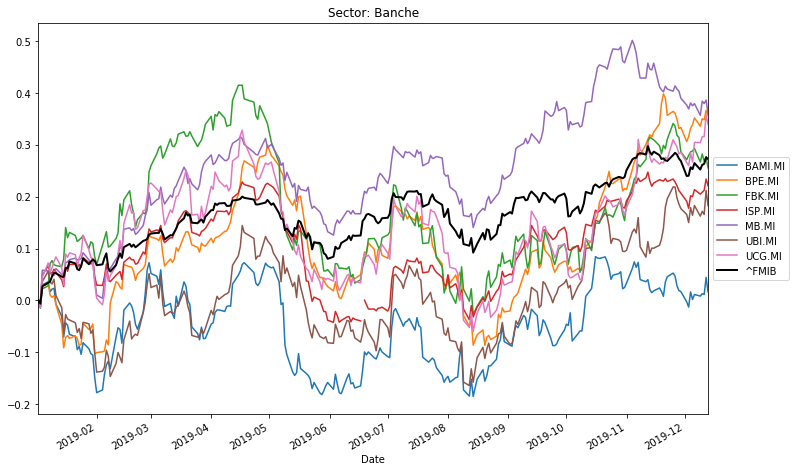

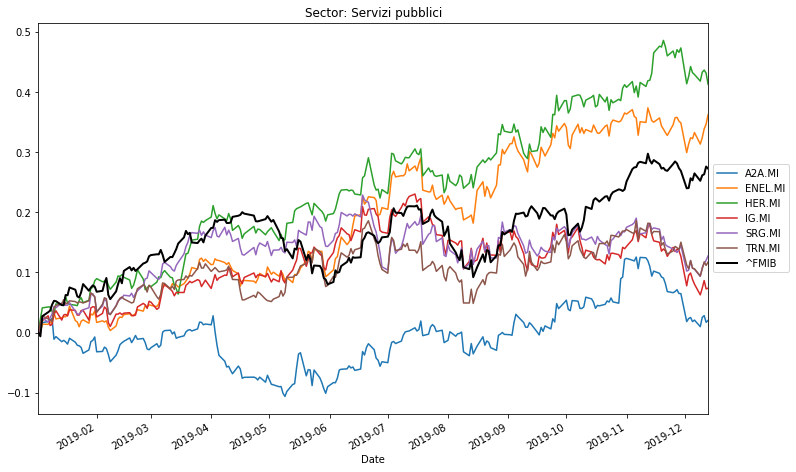

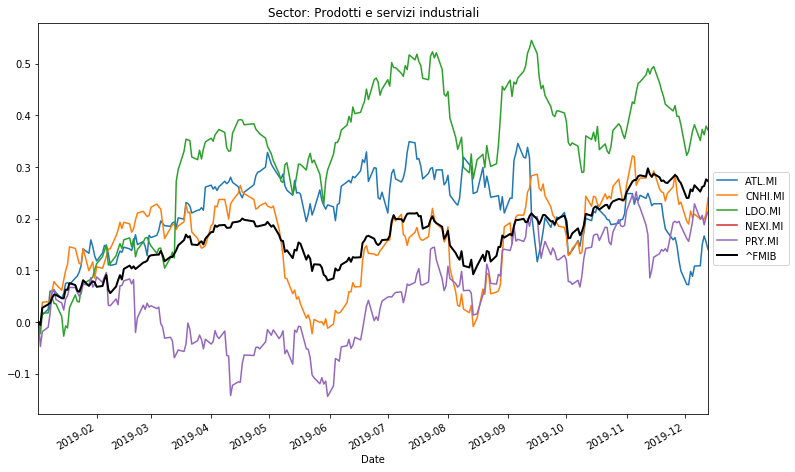

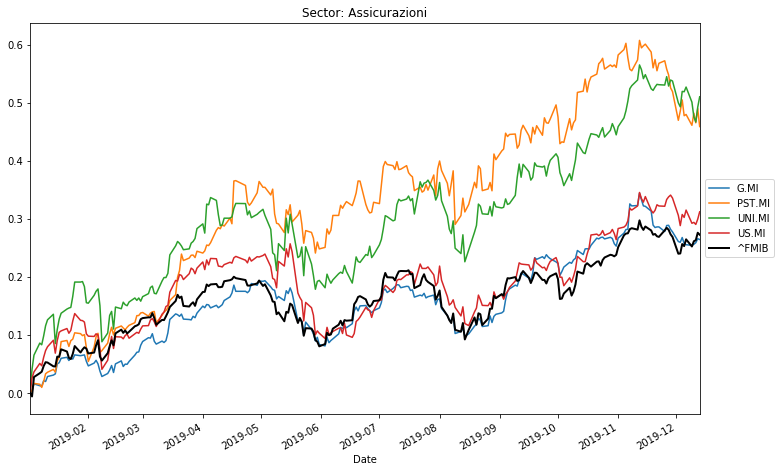

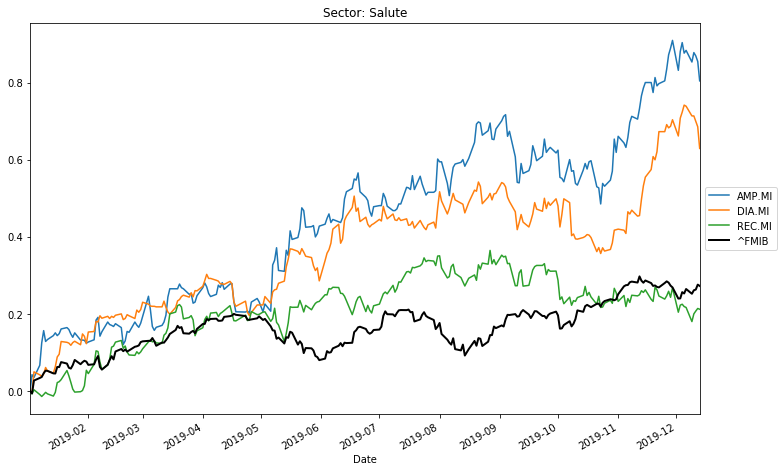

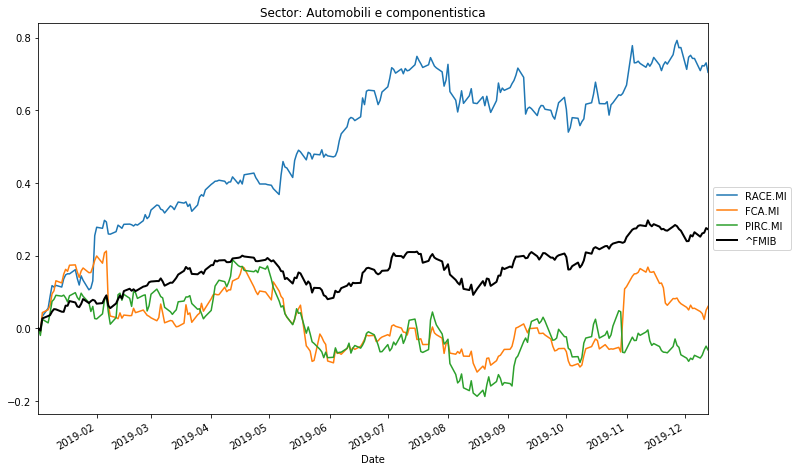

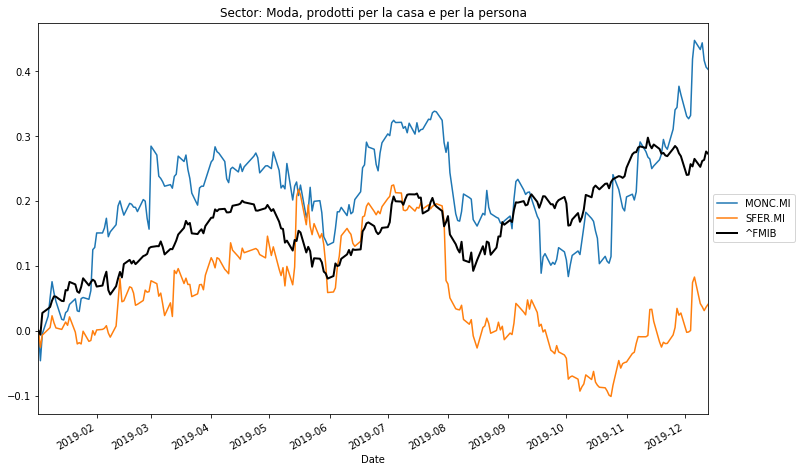

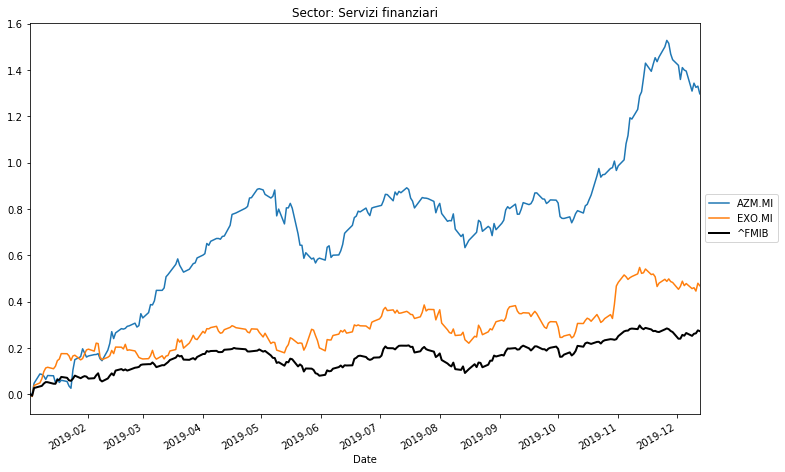

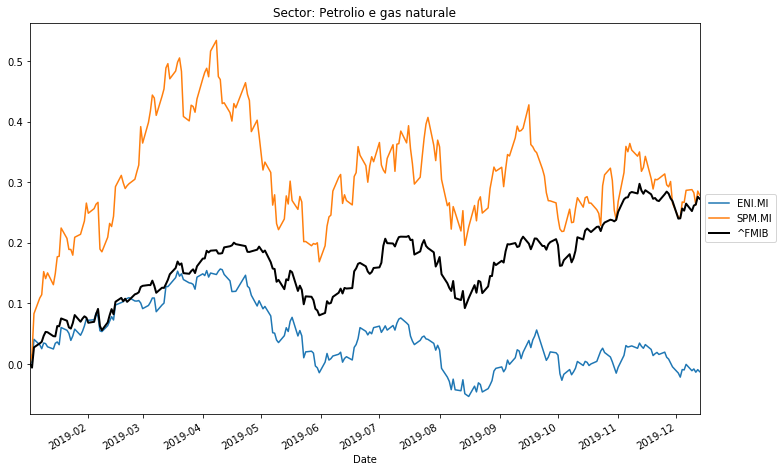

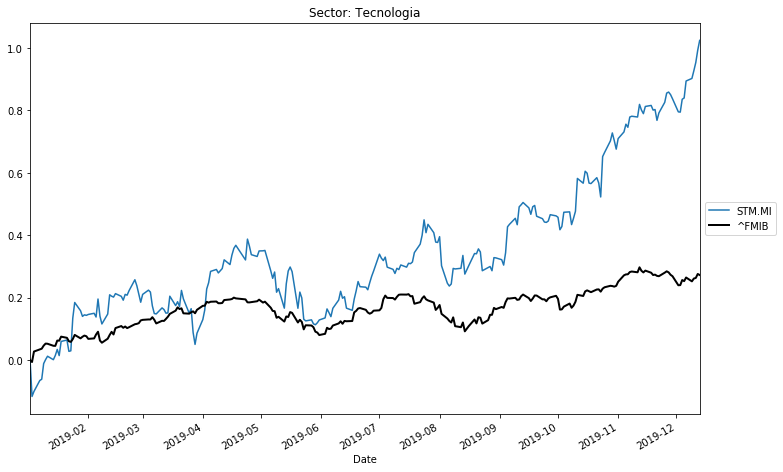

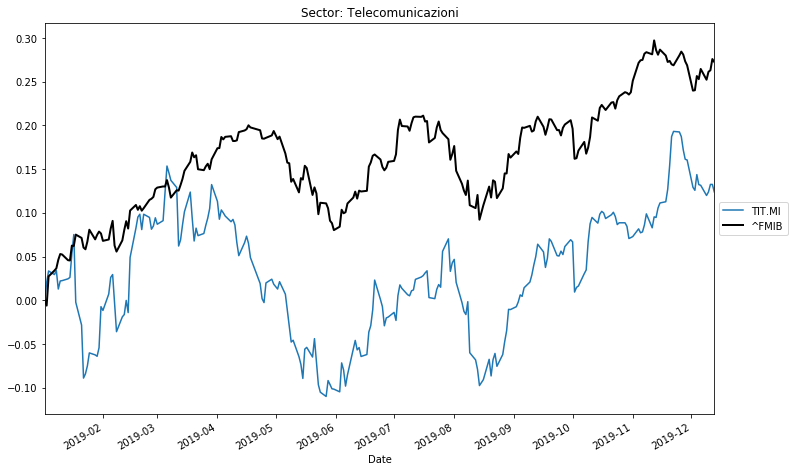

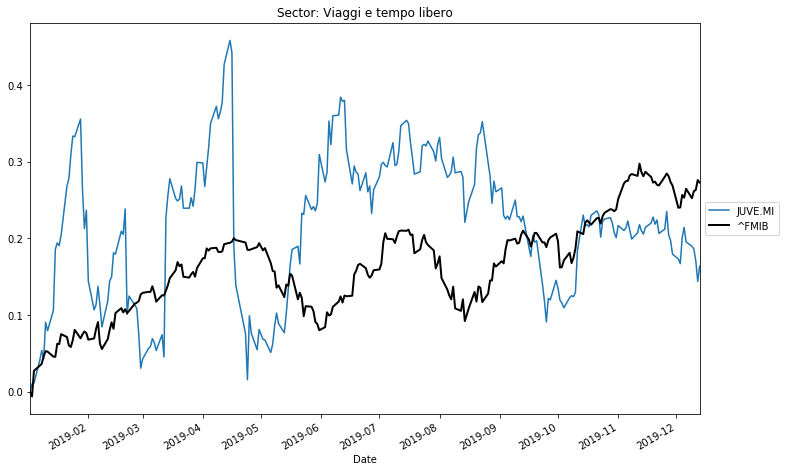

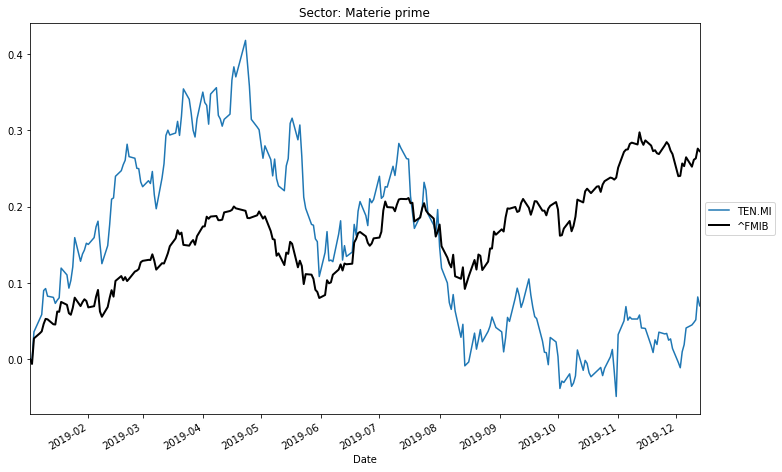

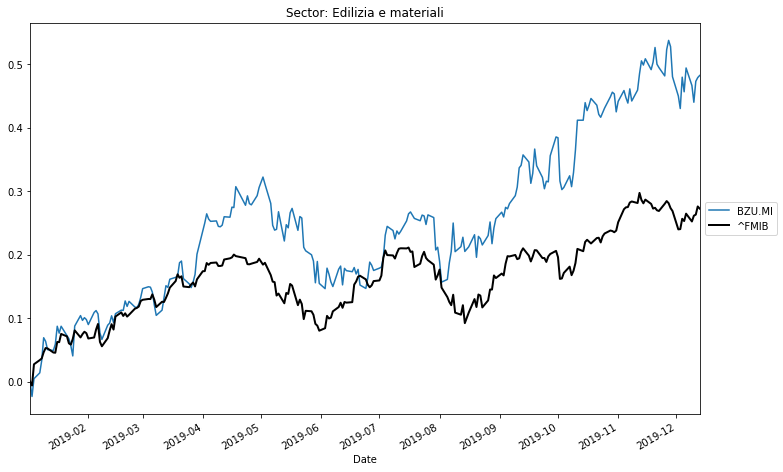

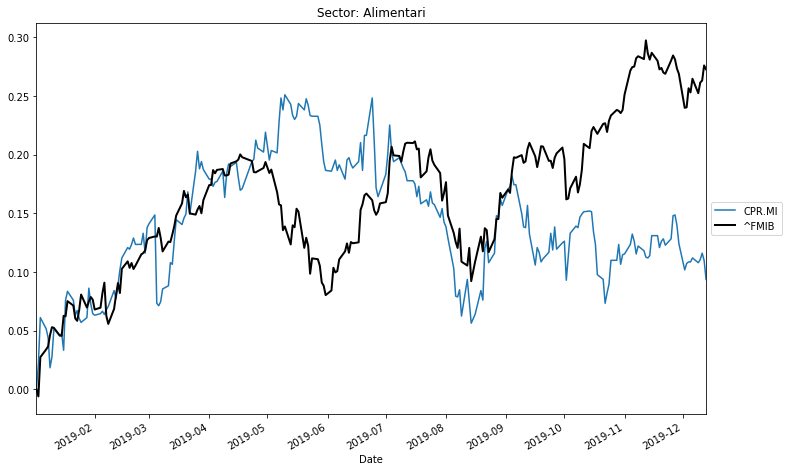

In [64]:
for sector in sector_list.index:
    sub_tickers = tickers[tickers['Sector']==sector].index
    fig, ax =  plt.subplots(figsize=(12,8))
    returns[sub_tickers].plot(ax=ax)
    MIB_r.plot(ax=ax, linewidth=2, c='k')
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Sector: {}'.format(sector))
    plt.show()

In [53]:
returns.columns

Index(['A2A.MI', 'AMP.MI', 'ATL.MI', 'AZM.MI', 'BAMI.MI', 'BGN.MI', 'BPE.MI',
       'BRE.MI', 'BZU.MI', 'CNHI.MI', 'CPR.MI', 'DIA.MI', 'ENEL.MI', 'ENI.MI',
       'EXO.MI', 'FBK.MI', 'FCA.MI', 'G.MI', 'IG.MI', 'ISP.MI', 'JUVE.MI',
       'LDO.MI', 'MB.MI', 'MONC.MI', 'PIRC.MI', 'PRY.MI', 'PST.MI', 'RACE.MI',
       'REC.MI', 'SFER.MI', 'SPM.MI', 'SRG.MI', 'STM.MI', 'TEN.MI', 'TIT.MI',
       'TRN.MI', 'UBI.MI', 'UCG.MI', 'UNI.MI', 'US.MI'],
      dtype='object', name='Symbols')